In [0]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2

#For colab cv2 imshow
from google.colab.patches import cv2_imshow

In [0]:
# load the two input images
imageA = cv2.imread('/content/sample_data/IMG-1627.JPG')
imageB = cv2.imread('/content/sample_data/IMG-1627-min1.JPG')

# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [0]:
# threshold the difference image, followed by finding contours 
# To obtain the regions of the two input images that differ

thresh = cv2.threshold(diff, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [0]:
# loop over the contours

for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original 



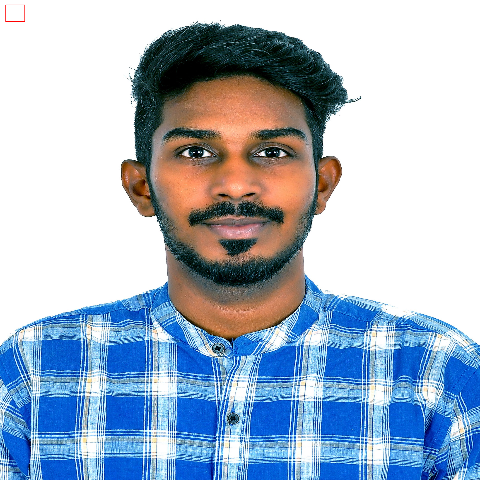

Modified 



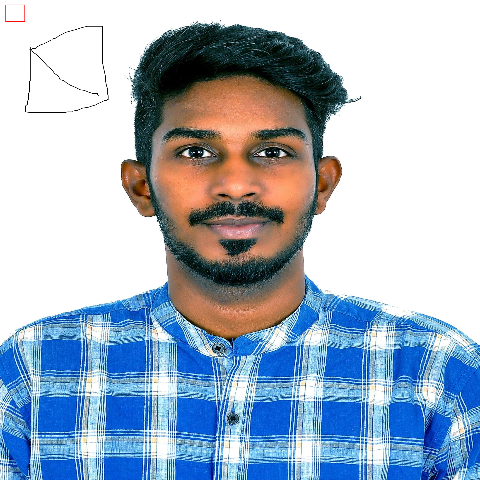

Diff 



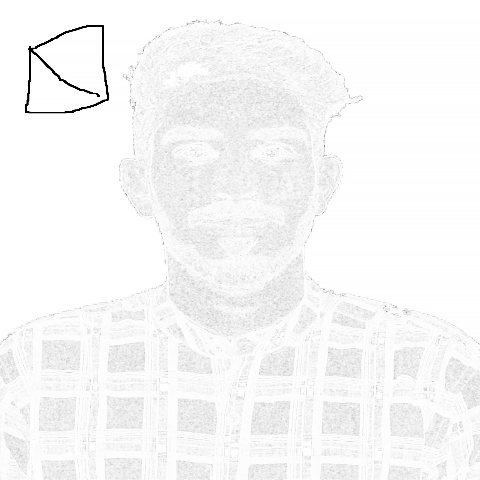

Thresh 



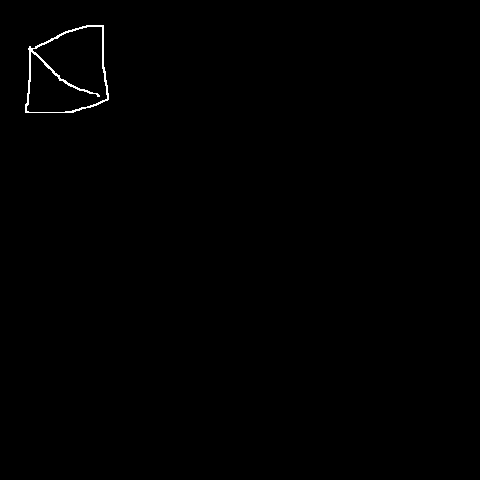

-1

In [32]:
# show the output images

print("Original \n")
imageA = cv2.resize(imageA,(480,480))
cv2_imshow(imageA)

print("Modified \n")
imageB = cv2.resize(imageB,(480,480))
cv2_imshow(imageB)

print("Diff \n")
diff = cv2.resize(diff,(480,480))
cv2_imshow(diff)

print("Thresh \n")
thresh = cv2.resize(thresh,(480,480))
cv2_imshow(thresh)

cv2.waitKey(0)